In [134]:
import numpy as np
import matplotlib.pyplot as plt

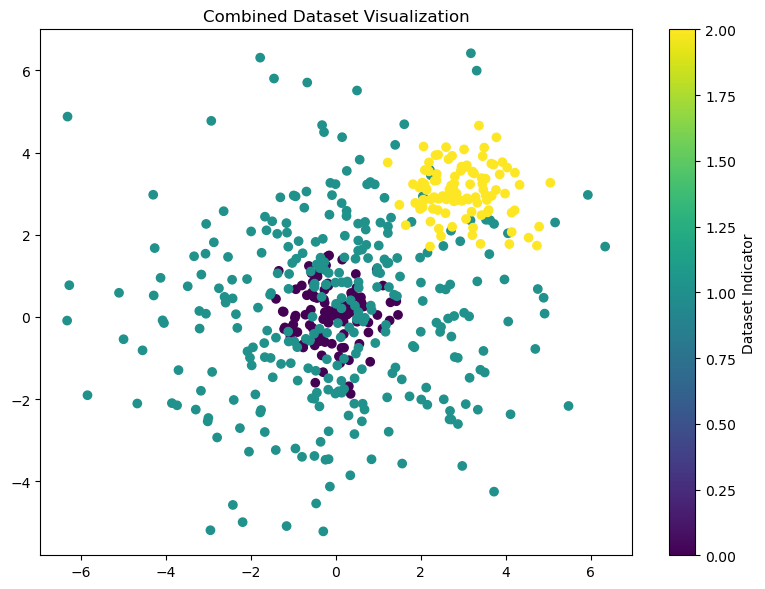

In [135]:
import numpy as np
import matplotlib.pyplot as plt

# DataSet A 
mean_A = [0, 0]
covariance_A = np.identity(2) * 0.5
X_A = np.random.multivariate_normal(mean_A, covariance_A, 100)

# DataSet B 
mean_B = [0, 0]
covariance_B = np.identity(2) * 5
X_B = np.random.multivariate_normal(mean_B, covariance_B, 300) 

# DataSet C 
mean_C = [3, 3]
covariance_C = np.identity(2) * 0.5
X_C = np.random.multivariate_normal(mean_C, covariance_C, 100)

# Combined datasets
X_combined = np.concatenate((X_A, X_B, X_C), axis=0)
y_combined = np.concatenate((np.zeros(100), np.ones(300), (np.ones(100) * 2)), axis=0)


# Create a scatter plot for the combined data
plt.figure(figsize=(8, 6))
plt.scatter(X_combined[:, 0], X_combined[:, 1], c=y_combined, cmap='viridis')
plt.title("Combined Dataset Visualization")
plt.colorbar().set_label('Dataset Indicator')
plt.tight_layout()
plt.show()


In [136]:
from sklearn.mixture import GaussianMixture

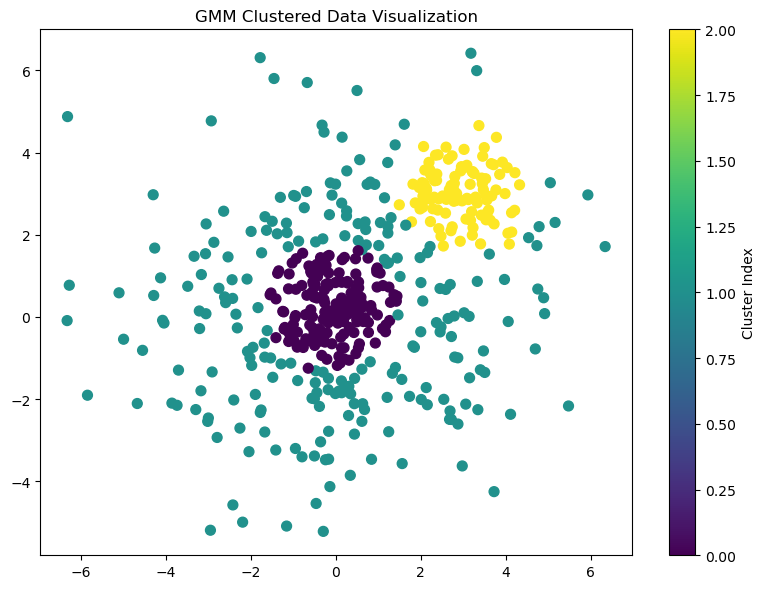

In [137]:
gmm_model = GaussianMixture(n_components=3, covariance_type='spherical').fit(X_combined)
predicted_labels = gmm_model.predict(X_combined)

# Plot the results from the Gaussian Mixture Model
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(X_combined[:, 0], X_combined[:, 1], c=predicted_labels, s=50, cmap='viridis')
ax.set_title("GMM Clustered Data Visualization")
fig.colorbar(scatter, ax=ax).set_label('Cluster Index')
plt.tight_layout()
plt.show()

In [138]:
from sklearn.cluster import KMeans

/Users/amaterasu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


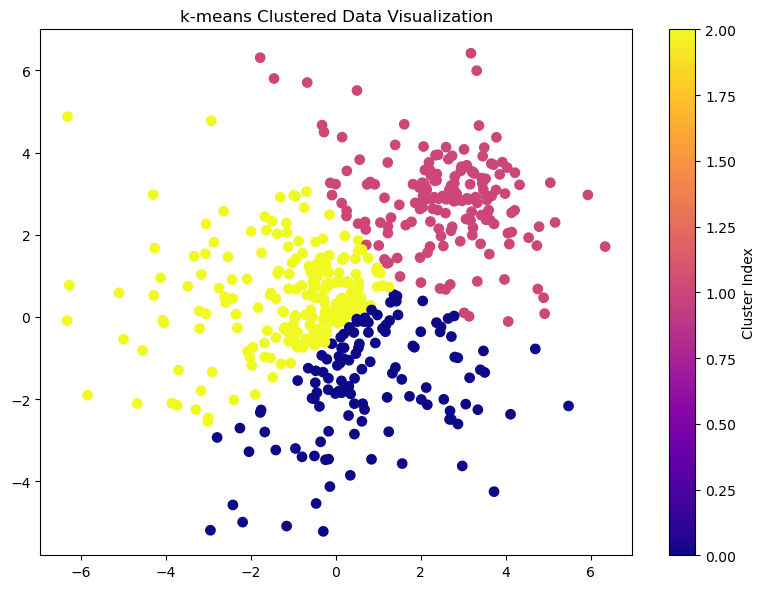

In [139]:
# Fitting the KMeans clustering model
kmeans_model = KMeans(n_clusters=3, random_state=0)
predicted_clusters = kmeans_model.fit_predict(X_combined)

# Visualizing the K-means Clustering outcomes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
cluster_scatter = ax.scatter(X_combined[:, 0], X_combined[:, 1], c=predicted_clusters, s=45, cmap='plasma')
ax.set_title("k-means Clustered Data Visualization")
fig.colorbar(cluster_scatter).set_label('Cluster Index')
plt.tight_layout()
plt.show()

In [140]:
# Calculate accuracy for Gaussian Mixture Model
gmm_accuracy = (np.sum(predicted_labels == y_combined) / len(y_combined)) * 100

# Calculate accuracy for KMeans clustering
kmeans_accuracy = (np.sum(predicted_clusters == y_combined) / len(y_combined)) * 100

# Display the clustering accuracies
print(f"Gaussian Mixture Model Accuracy: {gmm_accuracy}%")
print(f"K-means Clustering Accuracy: {kmeans_accuracy}%")


Gaussian Mixture Model Accuracy: 80.2%
K-means Clustering Accuracy: 18.0%


In [141]:
print("As observed, the Gaussian mixture model performs well but k-means does not")

As observed, the Gaussian mixture model performs well but k-means does not
